In [1]:
# Імпортуємо бібліотеку pandas для роботи з таблицями даних
import pandas as pd

# Вказуємо шлях до CSV-файлу (замініть 'scraped_data.csv' на ваш фактичний шлях до файлу)
file_path = 'scraped_data.csv'

# Завантажуємо дані з файлу CSV у DataFrame
df = pd.read_csv(file_path)



                                               Title  Year  \
0  U-Net and Its Variants for Medical Image Segme...  2021   
1  A Review of Deep Learning in Medical Imaging: ...  2021   
2  Recent Advances in Sparse Representation Based...  2021   
3  Automatic Medical Image Diagnosis: Highlights ...  2022   
4  DS-TransUNet: Dual Swin Transformer U-Net for ...  2022   

                                           Abstracts  
0  ["Abstract:\nU-net is an image segmentation te...  
1  ['Abstract:\nSince its renaissance, deep learn...  
2  ['Abstract:\nMedical image fusion, which aims ...  
3  ['Abstract:\nThe annual IEEE 5-Minute Video Cl...  
4  ['Abstract:\nAutomatic medical image segmentat...  


In [2]:
df

,Title,Year,Abstracts
0,U-Net and Its Variants for Medical Image Segme...,2021,"[""Abstract:\nU-net is an image segmentation te..."
1,A Review of Deep Learning in Medical Imaging: ...,2021,"['Abstract:\nSince its renaissance, deep learn..."
2,Recent Advances in Sparse Representation Based...,2021,"['Abstract:\nMedical image fusion, which aims ..."
3,Automatic Medical Image Diagnosis: Highlights ...,2022,['Abstract:\nThe annual IEEE 5-Minute Video Cl...
4,DS-TransUNet: Dual Swin Transformer U-Net for ...,2022,['Abstract:\nAutomatic medical image segmentat...
...,...,...,...
875,PSO based Medical Image Enhancement for Qualit...,2023,['Abstract:\nThis work provides a particle swa...
876,Recurrent Tissue-Aware Network for Deformable ...,2021,['Abstract:\nDeformable registration is fundam...
877,Multi-Modal Imaging Genetics Data Fusion via a...,2022,['Abstract:\nRecent studies show that multi-mo...
878,Gesture Recognition in Robotic Surgery With Mu...,2022,['Abstract:\nAutomatically recognising surgica...


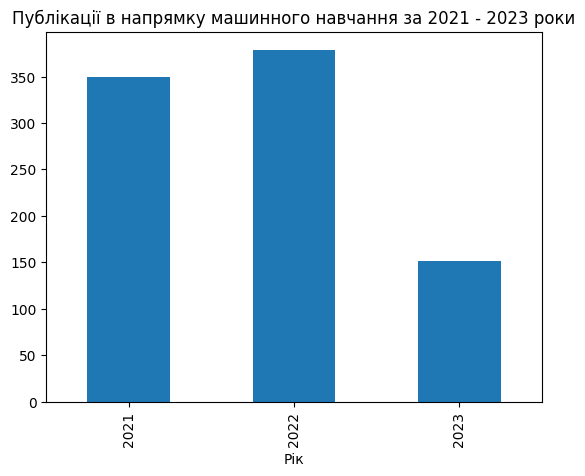

In [10]:
# Групуємо статті за стовпцем "Year"
groups = df.groupby("Year")

# Визначаємо кількість статей у кожній групі (кількість записів для кожного року)
counts = groups.size()

# Імпортуємо бібліотеку для візуалізації даних
import matplotlib.pyplot as plt
%matplotlib inline

# Будуємо стовпчикову діаграму на основі кількості статей за роками
counts.plot(kind='bar')

# Додаємо заголовок до графіка
plt.title("Публікації в напрямку машинного навчання за 2021 - 2023 роки")

# Додаємо підпис осі X
plt.xlabel("Рік")

# Друкуємо об'єкт групування (опціонально, для аналізу)
print(groups)


In [11]:
# Імпортуємо бібліотеку для роботи з регулярними виразами
import re

# Виводимо заголовки перших кількох рядків із DataFrame
print(df['Title'].head())

# Видаляємо знаки пунктуації (коми, крапки, знаки оклику та питання)
df['title_processed'] = df['Title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Перетворюємо всі символи у заголовках на малі літери
df['title_processed'] = df['title_processed'].map(lambda x: x.lower())

# Виводимо перші кілька оброблених заголовків
print(df['title_processed'].head())


0    U-Net and Its Variants for Medical Image Segme...
1    A Review of Deep Learning in Medical Imaging: ...
2    Recent Advances in Sparse Representation Based...
3    Automatic Medical Image Diagnosis: Highlights ...
4    DS-TransUNet: Dual Swin Transformer U-Net for ...
Name: Title, dtype: object
0    u-net and its variants for medical image segme...
1    a review of deep learning in medical imaging: ...
2    recent advances in sparse representation based...
3    automatic medical image diagnosis: highlights ...
4    ds-transunet: dual swin transformer u-net for ...
Name: title_processed, dtype: object


In [12]:
# Завантажуємо бібліотеку для роботи з регулярними виразами
import re
import pandas as pd

# Видаляємо пунктуацію та квадратні дужки
df['Abstracts_processed'] = df['Abstracts'].map(lambda x: re.sub('[,\.!?]', '', x))  # Видалення ком, крапок, знаків оклику та питання
df['Abstracts_processed'] = df['Abstracts_processed'].map(lambda x: re.sub(r'^\[|\]$', '', x))  # Видалення квадратних дужок на початку та в кінці

# Видаляємо одинарні та подвійні лапки
df['Abstracts_processed'] = df['Abstracts_processed'].map(lambda x: re.sub(r"['\"]", '', x))

# Обрізаємо перші 11 символів у кожному рядку
for i in range(len(df)):
    df['Abstracts_processed'][i] = df['Abstracts_processed'][i][11:]

# Перетворюємо текст на малі літери
df['Abstracts_processed'] = df['Abstracts_processed'].str.lower()

# Виводимо перші 5 оброблених анотацій для перевірки
print(df['Abstracts_processed'].head())


<ipython-input-12-7bbab4feb092>:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Abstracts_processed'][i] = df['Abstracts_processed'][i][11:]
<ipython-input-12-7bbab4feb092>:14: SettingWithCopyWarning: 
A value is trying to be set on a 

0    u-net is an image segmentation technique devel...
1    since its renaissance deep learning (dl) has b...
2    medical image fusion which aims to combine mul...
3    the annual ieee 5-minute video clip contest (5...
4    automatic medical image segmentation has made ...
Name: Abstracts_processed, dtype: object


<ipython-input-12-7bbab4feb092>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Abstracts_processed'][i] = df['Abstracts_processed'][i][11:]
<ipython-input-12-7bbab4feb092>:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this ke

<ipython-input-13-b3330ee7affc>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df["Abstracts_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True) | \
<ipython-input-13-b3330ee7affc>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["title_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True)


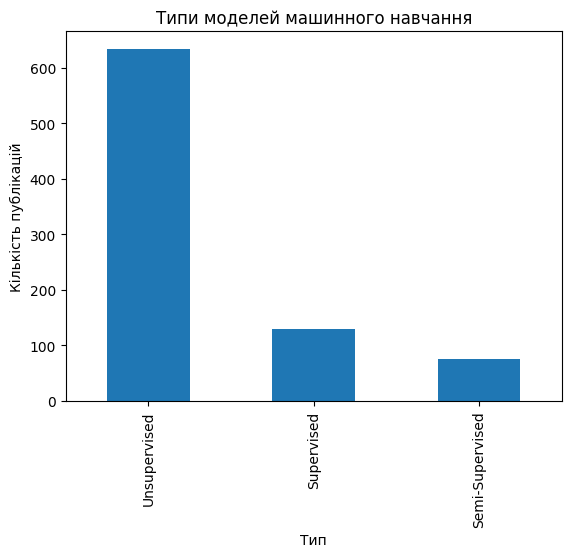

In [13]:
import matplotlib.pyplot as plt

# Створюємо логічну маску для фільтрації рядків, що відповідають пошуковим умовам
mask = df["Abstracts_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True) | \
       df["title_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True)

# Застосовуємо маску до DataFrame і рахуємо кількість випадків кожного типу моделі
type_counts = df[mask].apply(
    lambda x: "Semi-Supervised" if "semi" in x["Abstracts_processed"] or "semi" in x["title_processed"]  # Якщо в тексті є "semi", це напівконтрольоване навчання
    else "Supervised" if "supervised" in x["Abstracts_processed"] or "supervised" in x["title_processed"]  # Якщо є "supervised", це контрольоване навчання
    else "Unsupervised",  # В іншому випадку це неконтрольоване навчання
    axis=1
).value_counts()

# Відображаємо результати як стовпчикову діаграму
type_counts.plot(kind='bar')
plt.title("Типи моделей машинного навчання")  # Заголовок графіка
plt.xlabel("Тип")  # Підпис осі X
plt.ylabel("Кількість публікацій")  # Підпис осі Y
plt.show()


In [14]:
import re
import pandas as pd

# Функція для витягнення згадуваних моделей або методів з тексту
def extract_models(text):
    # Список шаблонів для пошуку поширених назв моделей або методів
    model_patterns = [
        r"U-Net", r"ResNet", r"GAN", r"SVM", r"DenseNet", r"VGGNet", r"InceptionNet", r"EfficientNet",
        r"MobileNet", r"V-Net", r"DeepLab", r"Mask R-CNN", r"R-CNN", r"NASNet", r"SE-Net", r"Xception",
        r"SR", r"Transformer", r"DS-TransUNet", r"MedMNIST", r"IoMT", r"DLaST", r"MED-MNIST",
        r"VinDr-CXR", r"DCAC", r"MAGAN"
    ]

    mentioned_models = []
    # Пошук шаблонів у тексті
    for pattern in model_patterns:
        if re.search(pattern, text, flags=re.IGNORECASE):  # Ігноруємо регістр під час пошуку
            mentioned_models.append(pattern)

    return mentioned_models

# Створюємо нову колонку 'Models_Used' для збереження знайдених моделей
df['Models_Used'] = ""

# Витягуємо згадані моделі для кожного рядка з колонок 'Abstracts_processed' та 'title_processed'
for i, (abstract, title) in enumerate(zip(df['Abstracts_processed'], df['title_processed'])):
    abstract_models = extract_models(abstract)  # Знайдені моделі в абстракті
    title_models = extract_models(title)        # Знайдені моделі в заголовку
    all_models = abstract_models + title_models # Об'єднуємо всі моделі
    unique_models = list(set(all_models))       # Видаляємо дублікати
    if unique_models:
        df.at[i, 'Models_Used'] = ', '.join(unique_models)  # Записуємо у колонку через кому
    else:
        df.at[i, 'Models_Used'] = "NA"  # Якщо моделі не знайдені, записуємо "NA"


In [ ]:
df.head(5)

,Title,Year,Abstracts,title_processed,Abstracts_processed,Models_Used
0,U-Net and Its Variants for Medical Image Segme...,2021,"[""Abstract:\nU-net is an image segmentation te...",u-net and its variants for medical image segme...,u-net is an image segmentation technique devel...,U-Net
1,A Review of Deep Learning in Medical Imaging: ...,2021,"['Abstract:\nSince its renaissance, deep learn...",a review of deep learning in medical imaging: ...,since its renaissance deep learning (dl) has b...,NA
2,Recent Advances in Sparse Representation Based...,2021,"['Abstract:\nMedical image fusion, which aims ...",recent advances in sparse representation based...,medical image fusion which aims to combine mul...,SR
3,Automatic Medical Image Diagnosis: Highlights ...,2022,['Abstract:\nThe annual IEEE 5-Minute Video Cl...,automatic medical image diagnosis: highlights ...,the annual ieee 5-minute video clip contest (5...,GAN
4,DS-TransUNet: Dual Swin Transformer U-Net for ...,2022,['Abstract:\nAutomatic medical image segmentat...,ds-transunet: dual swin transformer u-net for ...,automatic medical image segmentation has made ...,"U-Net, DS-TransUNet, Transformer"


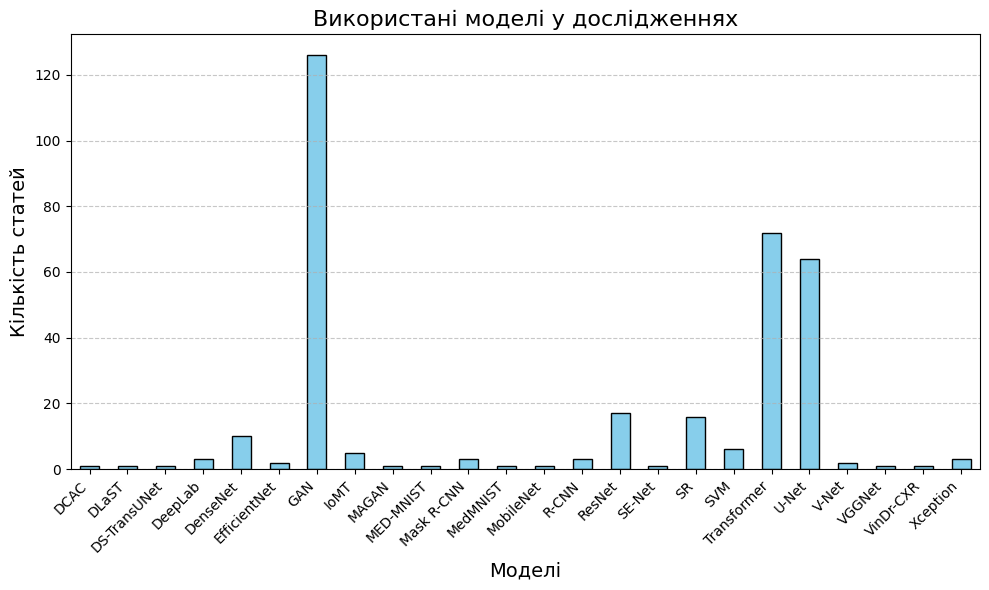

In [15]:
# Видаляємо NA значення та рядки, де у колонці "Models_Used" записано "NA"
df_cleaned = df.dropna(subset=["Models_Used"])  # Видаляємо рядки з пропущеними значеннями в "Models_Used"
df_cleaned = df_cleaned[df_cleaned["Models_Used"] != "NA"]  # Видаляємо рядки, де "Models_Used" містить "NA"

# Розділяємо моделі, перелічені через кому, на окремі рядки
df_split = df_cleaned.assign(Models_Used=df_cleaned["Models_Used"].str.split(", ")).explode("Models_Used")

# Групуємо статті за моделями, які використовувалися
groups = df_split.groupby("Models_Used")

# Підраховуємо кількість статей для кожної моделі
counts = groups.size()

# Візуалізуємо підрахунки у вигляді стовпчикової діаграми
import matplotlib.pyplot as plt
%matplotlib inline

# Створюємо графік
counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title("Використані моделі у дослідженнях", fontsize=16)
plt.xlabel("Моделі", fontsize=14)
plt.ylabel("Кількість статей", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Повертаємо назви моделей для зручного читання
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Оптимізуємо простір графіка
plt.show()


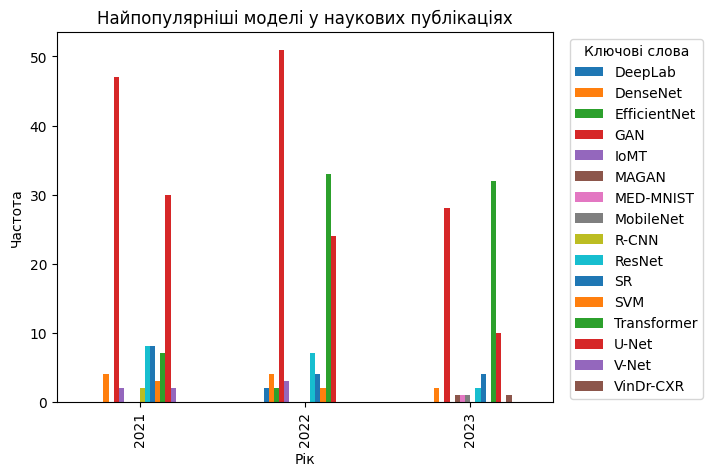

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Видаляємо рядки, де в колонці "Models_Used" значення відсутні (NaN)
df = df.dropna(subset=["Models_Used"])
# Видаляємо рядки, де в колонці "Models_Used" значення рівне "NA" (рядки, де моделі не знайдені)
df = df[df["Models_Used"] != "NA"]

# Розділяємо перелічені моделі в колонці "Models_Used" на окремі рядки, використовуючи "explode"
df = df.assign(Models_Used=df["Models_Used"].str.split(", ")).explode("Models_Used")

# Групуємо статті за роками публікації та підраховуємо частоту згадувань моделей
# Для кожного року обираємо топ-10 найчастіше згадуваних моделей
keyword_counts = df.groupby("Year")["Models_Used"].apply(lambda x: x.value_counts().nlargest(10))

# Побудова стовпчикової діаграми
# Використовуємо unstack() для формування таблиці, де моделі — це стовпці, а роки — рядки
ax = keyword_counts.unstack().plot(kind='bar')

# Додаємо заголовок графіка
plt.title("Найпопулярніші моделі у наукових публікаціях")
# Підпис осі X
plt.xlabel("Рік")
# Підпис осі Y
plt.ylabel("Частота")

# Переміщуємо легенду праворуч від графіка
plt.legend(title="Ключові слова", bbox_to_anchor=(1.02, 1), loc="upper left")

# Відображаємо графік
plt.show()


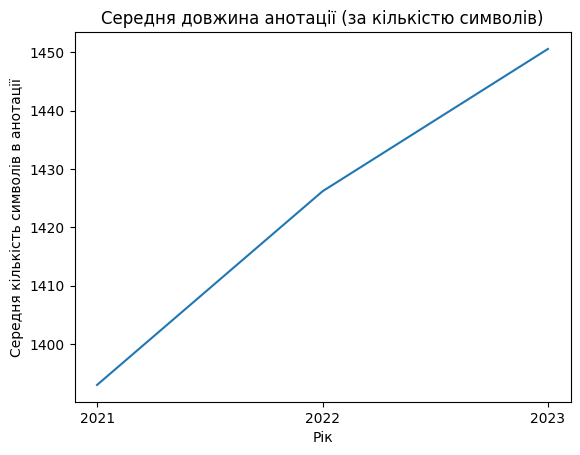

In [20]:
# Обчислюємо довжину анотацій, використовуючи метод .str.len(), щоб отримати кількість символів у кожній анотації
df['Abstract_Length'] = df['Abstracts_processed'].str.len()

# Групуємо статті за роками публікації та обчислюємо середню довжину анотації для кожного року
average_length = df.groupby('Year')['Abstract_Length'].mean()

# Створюємо лінійний графік середньої довжини анотації за роками
plt.plot(average_length.index, average_length.values)
# Додаємо заголовок графіка
plt.title('Середня довжина анотації (за кількістю символів)')
# Підпис осі X
plt.xlabel('Рік')
# Підпис осі Y
plt.ylabel('Середня кількість символів в анотації')

# Встановлюємо мітки на осі X, відповідно до років публікацій
plt.xticks(average_length.index)

# Відображаємо графік
plt.show()


In [21]:
# Імпортуємо необхідні бібліотеки
import numpy as np  # для роботи з масивами
import matplotlib.pyplot as plt  # для візуалізації даних
from tqdm import tqdm  # для відображення прогресу виконання
import cv2  # для роботи з зображеннями
import os  # для роботи з файловою системою
import seaborn as sns  # для статистичної візуалізації
import tensorflow as tf  # основна бібліотека для роботи з TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # вимикаємо повідомлення про попередження від TensorFlow

# Імпортуємо модулі з Keras для побудови нейронних мереж
from keras.models import Sequential, Model  # для побудови моделей
from keras.layers import Dense, Flatten, Conv2D, Reshape, Input, Conv2DTranspose  # різні шари для моделі
from keras.layers import Activation, LeakyReLU, BatchNormalization, Dropout, Resizing  # додаткові шари
from keras.losses import BinaryCrossentropy  # функція втрат для бінарної класифікації
from tensorflow.keras.applications import VGG16  # попередньо навчені моделі, зокрема VGG16

import warnings  # для керування попередженнями
warnings.filterwarnings('ignore')  # ігноруємо попередження виведені бібліотеками

# Перевіряємо наявність оптимізатора Adam в TensorFlow або Keras
try:
    from tensorflow.keras.optimizers import Adam  # оптимізатор Adam з TensorFlow
except:
    from keras.optimizers import Adam  # оптимізатор Adam з Keras


In [22]:
NOISE_DIM = 100
BATCH_SIZE = 4
STEPS_PER_EPOCH = 4000
EPOCHS = 10
SEED = 40
WIDTH, HEIGHT, CHANNELS = 128, 128, 1

OPTIMIZER = Adam(0.0002, 0.5)

In [24]:
import zipfile

# Вказуємо ім'я архіву (наприклад, 'your_archive.zip')
zip_file = 'archive (1).zip'

# Розархівовуємо архів
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("/content/input/brain-mri-images-for-brain-tumor-detection")  # Вказуємо директорію для розархівації

# Перевіряємо вміст розархівованої директорії
os.listdir("/content/input/brain-mri-images-for-brain-tumor-detection")


['brain_tumor_dataset', 'yes', 'no']

In [29]:
MAIN_DIR = "/content/input/brain-mri-images-for-brain-tumor-detection/yes"

In [26]:
# Функція для завантаження зображень з папки та їх попередньої обробки
def load_images(folder):
    # Список для зберігання зображень
    imgs = []

    # Встановлення початкового значення для мітки (всі мітки = 1)
    target = 1
    labels = []  # Список для зберігання міток

    # Перебираємо всі файли в папці
    for i in os.listdir(folder):
        # Отримуємо повний шлях до зображення
        img_dir = os.path.join(folder, i)

        try:
            # Завантажуємо зображення за допомогою OpenCV
            img = cv2.imread(img_dir)

            # Перетворюємо зображення в відтінки сірого
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Змінюємо розмір зображення на 128x128 пікселів
            img = cv2.resize(img, (128, 128))

            # Додаємо оброблене зображення в список
            imgs.append(img)

            # Додаємо мітку для цього зображення (в даному випадку всі мітки = 1)
            labels.append(target)
        except:
            # Якщо сталося виключення (наприклад, файл не зображення), просто пропускаємо його
            continue

    # Перетворюємо списки зображень та міток у NumPy масиви
    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels


In [30]:
data, labels = load_images(MAIN_DIR)
data.shape, labels.shape

((155, 128, 128), (155,))

In [31]:
# Генерація 20 випадкових чисел для індексації зображень з даних
np.random.seed(SEED)  # Встановлюємо фіксоване значення генератора випадкових чисел для відтворюваності результатів
idxs = np.random.randint(0, 155, 20)  # Генеруємо 20 випадкових чисел в діапазоні від 0 до 155 (включно), щоб вибрати зображення


In [32]:
X_train = data[idxs]
X_train.shape

(20, 128, 128)

In [33]:
# Нормалізація зображень
X_train = (X_train.astype(np.float32) - 127.5) / 127.5  # Перетворюємо пікселі зображень в діапазон від -1 до 1 (після конвертації в np.float32)

# Зміна форми зображень
X_train = X_train.reshape(-1, WIDTH, HEIGHT, CHANNELS)  # Переводимо зображення в формат (кількість зображень, висота, ширина, кількість каналів)

# Перевірка форми даних
X_train.shape  # Перевіряємо, чи правильно змінилась форма масиву


(20, 128, 128, 1)

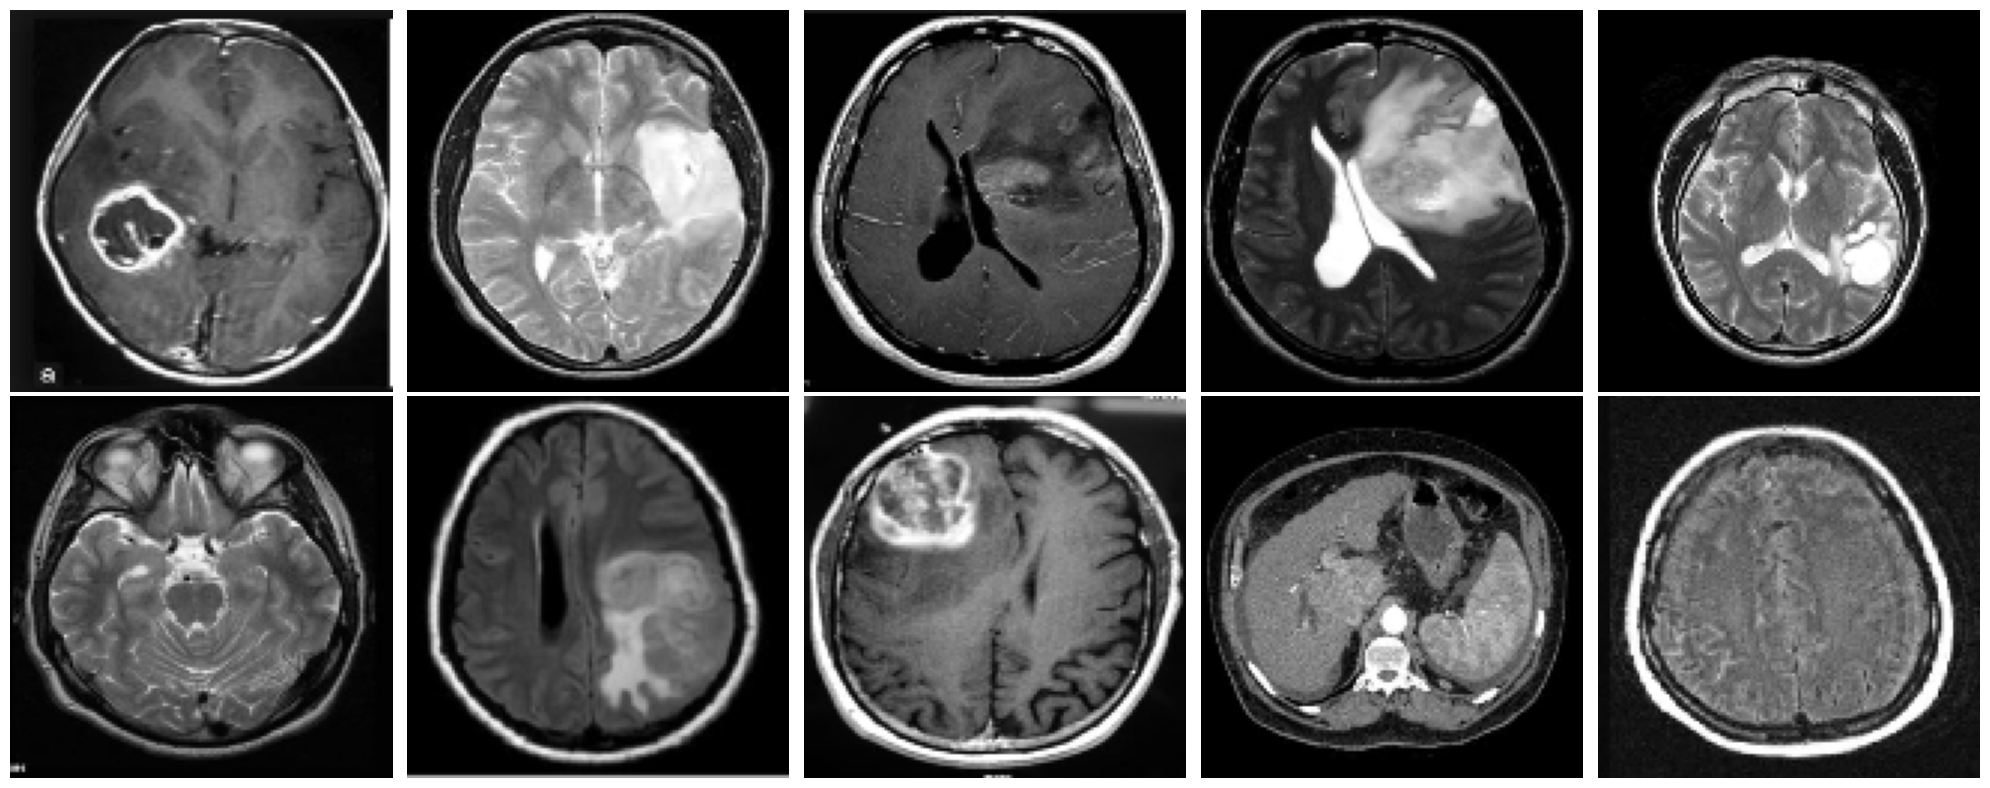

In [34]:
# Побудова графіка з реальними зображеннями
plt.figure(figsize=(20,8))  # Встановлюємо розмір фігури для графіка (ширина, висота)

# Цикл для виведення 10 зображень
for i in range(10):
    axs = plt.subplot(2,5,i+1)  # Створюємо підплощину для кожного зображення (2 рядки, 5 стовпців)
    plt.imshow(X_train[i], cmap="gray")  # Відображаємо зображення у відтінках сірого
    plt.axis('off')  # Вимикаємо осі
    axs.set_xticklabels([])  # Вимикаємо підписи на осі X
    axs.set_yticklabels([])  # Вимикаємо підписи на осі Y
    plt.subplots_adjust(wspace=None, hspace=None)  # Встановлюємо розмір між підплощинами

plt.tight_layout()  # Автоматичне налаштування відстаней між підплощинами для кращого вигляду



In [35]:
# Архітектура генератора
def build_generator():
    """
    Генератор створює зображення, використовуючи випадковий шум. Випадковий шум, або латентний вектор,
    отримується з нормального розподілу, який передається на вхід генератора. За допомогою транспонованих
    згорток (Transposed Convolution), латентний вектор трансформується, щоб створити зображення.
    Використовуємо 3 шари Conv2DTranspose (які допомагають створювати зображення за допомогою ознак;
    це зворотна операція від звичайних згорток).

    Вхід: Випадковий шум / Латентний вектор
    Вихід: Зображення
    """

    # Створення моделі
    model = Sequential([

        # Перший шар: Перетворює латентний вектор в 3D тензор розміру (32, 32, 256)
        Dense(32*32*256, input_dim=NOISE_DIM),  # Вхідний розмір визначений параметром NOISE_DIM
        LeakyReLU(alpha=0.2),  # Лінійна активація з незначним нахилом
        Reshape((32, 32, 256)),  # Перетворює результат в потрібну форму для подальших операцій

        # Другий шар: Транспонована згортка для збільшення простору зображення
        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),  # Шар транспонованої згортки
        LeakyReLU(alpha=0.2),  # Лінійна активація з незначним нахилом

        # Третій шар: Інша транспонована згортка
        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        # Фінальний шар: Транспонована згортка для отримання зображення з 3 каналами (наприклад, RGB)
        Conv2D(CHANNELS, (4, 4), padding='same', activation='tanh')  # Використовуємо tanh для нормалізації виходу
    ],
    name="generator")  # Назва моделі генератора
    model.summary()  # Виведення архітектури моделі
    model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)  # Компіляція моделі

    return model  # Повертаємо модель генератора


In [36]:
# Архітектура дискримінатора
def build_discriminator():
    """
    Дискримінатор - це модель, яка відповідає за класифікацію згенерованих зображень
    як підроблених чи реальних. Нашою кінцевою метою є створити генератор, настільки потужний,
    що дискримінатор не зможе відрізнити реальні та підроблені зображення.
    Це проста модель згорткової нейронної мережі з 2 шарами Conv2D, підключеними до вихідного шару Dense.
    Активація вихідного шару - Sigmoid, оскільки це двокласовий класифікатор.

    Вхід: Генероване / Реальне зображення
    Вихід: Дійсність зображення (підроблене чи реальне)
    """

    # Створення моделі дискримінатора
    model = Sequential([

        # Перший шар: Згортка для виявлення основних ознак в зображенні
        Conv2D(64, (3, 3), padding='same', input_shape=(WIDTH, HEIGHT, CHANNELS)),  # Вхідний шар
        LeakyReLU(alpha=0.2),  # Активація LeakyReLU з невеликим нахилом

        # Другий шар: Згортка для подальшого зниження розміру та знаходження більш складних ознак
        Conv2D(128, (3, 3), strides=2, padding='same'),  # Стратегії для зменшення простору зображення
        LeakyReLU(alpha=0.2),  # Активація LeakyReLU

        # Третій шар: Інша згортка для подальшої редукції простору зображення
        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        # Четвертий шар: Ще одна згортка для фільтрації та підготовки до класифікації
        Conv2D(256, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        # Перетворення в одномірний вектор для подальшої класифікації
        Flatten(),  # Перетворює 3D-дані в 1D вектор

        # Дроп-аут для уникнення переобучення
        Dropout(0.4),  # Випадкове виключення 40% нейронів для кращої генералізації

        # Останній шар: Вихідний шар для класифікації зображення як реальне чи підроблене
        Dense(1, activation="sigmoid", input_shape=(WIDTH, HEIGHT, CHANNELS))  # Sigmoid для двокласової класифікації
    ], name="discriminator")  # Назва моделі дискримінатора
    model.summary()  # Виведення архітектури моделі
    model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)  # Компіляція моделі

    return model  # Повертаємо модель дискримінатора


In [37]:
# Поєднання генератора та дискримінатора у єдину модель (GAN)

print('\n')

# Створення дискримінатора
discriminator = build_discriminator()
print('\n')

# Створення генератора
generator = build_generator()

# Заморожуємо параметри дискримінатора (тобто він не буде тренуватися під час тренування GAN)
discriminator.trainable = False

# Вхід для генератора: випадковий шум (latent vector)
gan_input = Input(shape=(NOISE_DIM,))  # Вхід до генератора

# Генерація зображення за допомогою генератора
fake_image = generator(gan_input)  # Генерація підробленого зображення

# Визначення, чи є згенероване зображення реальним або підробленим за допомогою дискримінатора
gan_output = discriminator(fake_image)  # Дискримінатор оцінює зображення

# Створення моделі GAN: на вхід подається випадковий шум, а на виході - результат роботи дискримінатора
gan = Model(gan_input, gan_output, name="gan_model")

# Компіляція моделі GAN: в якості функції втрат використовується binary_crossentropy, оптимізатор Adam
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

print("The Combined Network:\n")

# Виведення архітектури комбінованої моделі GAN
gan.summary()


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          65,537 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 582,785 (2.22 MB)

 Trainable params: 582,785 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 262144)              │      26,476,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 64, 64, 128)         │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 128, 128, 128)       │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 1)         │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,265,281 (104.01 MB)

 Trainable params: 27,265,281 (104.01 MB)

 Non-trainable params: 0 (0.00 B)

The Combined Network:



Model: "gan_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ generator (Sequential)               │ (None, 128, 128, 1)         │      27,265,281 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ discriminator (Sequential)           │ (None, 1)                   │         582,785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,848,066 (106.23 MB)

 Trainable params: 27,265,281 (104.01 MB)

 Non-trainable params: 582,785 (2.22 MB)

In [38]:
def sample_images(noise, subplots, figsize=(22,8), save=False):
    """
    Функція для генерації та відображення зображень, що згенеровані генератором.

    Параметри:
    noise: масив шумових векторів (latent vectors), що подаються генератору для створення зображень.
    subplots: кортеж з кількості рядків і стовпців для відображення зображень на графіку.
    figsize: розмір графіку.
    save: булевий параметр. Якщо True, зберігає згенеровані зображення як файли.
    """

    # Генерація зображень за допомогою генератора
    generated_images = generator.predict(noise)

    # Налаштування розміру графіку
    plt.figure(figsize=figsize)

    # Перебір згенерованих зображень
    for i, image in enumerate(generated_images):
        # Визначення позиції на графіку для поточного зображення
        plt.subplot(subplots[0], subplots[1], i+1)

        # Якщо зображення чорно-біле (один канал), відображаємо його в чорно-білому режимі
        if CHANNELS == 1:
            plt.imshow(image.reshape((WIDTH, HEIGHT)), cmap='gray')
        else:
            # Якщо зображення кольорове, відображаємо його з кількома каналами
            plt.imshow(image.reshape((WIDTH, HEIGHT, CHANNELS)))

        # Якщо параметр save дорівнює True, зберігаємо зображення
        if save == True:
            img_name = "gen" + str(i)  # Генерація імені файлу для збереження
            plt.savefig(img_name)  # Збереження зображення

        # Вимикаємо осі для зручності перегляду
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.axis('off')

    # Автоматичне налаштування відступів між зображеннями
    plt.tight_layout()

    # Показуємо згенеровані зображення
    plt.show()


In [ ]:
# Навчання
# Встановлюємо фіксоване значення для генерації випадкових чисел для відтворюваності результатів
np.random.seed(SEED)

# Проходимо через кожну епоху (10 епох)
for epoch in range(10):

    # Проходимо через кожен батч в межах епохи
    for batch in tqdm(range(STEPS_PER_EPOCH)):

        # Генеруємо випадковий шум, що використовується як вхід для генератора
        noise = np.random.normal(0, 1, size=(BATCH_SIZE, NOISE_DIM))

        # Генеруємо фальшиві зображення за допомогою генератора
        fake_X = generator.predict(noise)

        # Вибираємо випадкові індекси для реальних зображень з тренувальної вибірки
        idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)
        real_X = X_train[idx]

        # Об'єднуємо реальні та фальшиві зображення для тренування дискримінатора
        X = np.concatenate((real_X, fake_X))

        # Створюємо мітки для дискримінатора (1 - реальне, 0 - фальшиве)
        disc_y = np.zeros(2*BATCH_SIZE)
        disc_y[:BATCH_SIZE] = 1

        # Тренуємо дискримінатор на об'єднаному наборі даних
        d_loss = discriminator.train_on_batch(X, disc_y)

        # Мітки для генератора (всі мають бути 1, оскільки ми хочемо, щоб генератор генерував реальні зображення)
        y_gen = np.ones(BATCH_SIZE)

        # Тренуємо GAN (генератор + дискримінатор) на новому шумі
        g_loss = gan.train_on_batch(noise, y_gen)

    # Виводимо результати для кожної епохи (втрата для генератора та дискримінатора)
    print(f"EPOCH: {epoch + 1} Генератор: Втрата {g_loss:.4f}, Дискримінатор: Втрата {d_loss:.4f}")

    # Генеруємо зображення після кожної епохи для візуалізації
    noise = np.random.normal(0, 1, size=(10, NOISE_DIM))
    sample_images(noise, (2, 5))

# Генерація зображень після тренування
# Генеруємо більше шуму і створюємо зображення для оцінки результатів тренування
noise = np.random.normal(0, 1, size=(100, NOISE_DIM))
sample_images(noise, (10, 10), (24, 20), save=True)


  0%|          | 0/4000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


  0%|          | 1/4000 [00:05<6:11:43,  5.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


  0%|          | 2/4000 [00:10<5:43:53,  5.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


  0%|          | 3/4000 [00:13<4:47:40,  4.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


  0%|          | 4/4000 [00:16<4:19:01,  3.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  0%|          | 5/4000 [00:20<4:03:09,  3.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


  0%|          | 6/4000 [00:25<4:31:17,  4.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


  0%|          | 7/4000 [00:28<4:13:34,  3.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  0%|          | 8/4000 [00:31<4:01:48,  3.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  0%|          | 9/4000 [00:37<4:48:00,  4.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


  0%|          | 10/4000 [00:41<4:35:33,  4.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


  0%|          | 11/4000 [00:44<4:16:23,  3.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


  0%|          | 12/4000 [00:47<4:03:49,  3.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


  0%|          | 13/4000 [00:51<4:13:54,  3.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


  0%|          | 14/4000 [00:55<4:11:08,  3.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  0%|          | 15/4000 [00:58<4:00:11,  3.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


  0%|          | 16/4000 [01:02<3:54:12,  3.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  0%|          | 17/4000 [01:07<4:24:03,  3.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


  0%|          | 18/4000 [01:12<4:56:04,  4.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


  0%|          | 19/4000 [01:17<5:05:59,  4.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


  0%|          | 20/4000 [01:22<5:06:37,  4.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  1%|          | 21/4000 [01:25<4:38:09,  4.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


  1%|          | 22/4000 [01:28<4:18:08,  3.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  1%|          | 23/4000 [01:32<4:09:04,  3.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


  1%|          | 24/4000 [01:36<4:25:10,  4.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


  1%|          | 25/4000 [01:39<4:09:01,  3.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


  1%|          | 26/4000 [01:43<3:59:25,  3.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


  1%|          | 27/4000 [01:46<3:56:49,  3.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


  1%|          | 28/4000 [01:51<4:15:41,  3.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  1%|          | 29/4000 [01:54<4:02:33,  3.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  1%|          | 30/4000 [01:57<3:53:23,  3.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  1%|          | 31/4000 [02:01<3:53:43,  3.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


  1%|          | 32/4000 [02:05<4:12:28,  3.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


  1%|          | 33/4000 [02:08<4:00:49,  3.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


  1%|          | 34/4000 [02:12<3:52:56,  3.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


  1%|          | 35/4000 [02:15<3:57:32,  3.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


  1%|          | 36/4000 [02:20<4:14:05,  3.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  1%|          | 37/4000 [02:23<4:09:03,  3.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  1%|          | 38/4000 [02:27<4:14:37,  3.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


  1%|          | 39/4000 [02:33<4:45:06,  4.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


  1%|          | 40/4000 [02:37<4:32:59,  4.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


  1%|          | 41/4000 [02:40<4:22:32,  3.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  1%|          | 42/4000 [02:44<4:14:37,  3.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


  1%|          | 43/4000 [02:49<4:37:45,  4.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


  1%|          | 44/4000 [02:52<4:18:51,  3.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


  1%|          | 45/4000 [02:55<4:05:54,  3.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


  1%|          | 46/4000 [02:59<4:01:23,  3.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


  1%|          | 47/4000 [03:04<4:21:41,  3.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


  1%|          | 48/4000 [03:07<4:07:34,  3.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  1%|          | 49/4000 [03:10<3:56:47,  3.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  1%|▏         | 50/4000 [03:14<3:57:26,  3.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


  1%|▏         | 51/4000 [03:18<4:15:27,  3.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  1%|▏         | 52/4000 [03:21<4:02:26,  3.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  1%|▏         | 53/4000 [03:25<3:54:05,  3.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


  1%|▏         | 54/4000 [03:28<3:58:21,  3.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


  1%|▏         | 55/4000 [03:33<4:13:10,  3.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  1%|▏         | 56/4000 [03:36<4:01:43,  3.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  1%|▏         | 57/4000 [03:39<3:53:42,  3.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


  1%|▏         | 58/4000 [03:43<4:02:38,  3.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


  1%|▏         | 59/4000 [03:48<4:12:51,  3.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


  2%|▏         | 60/4000 [03:51<4:01:19,  3.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


  2%|▏         | 61/4000 [03:54<3:52:44,  3.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  2%|▏         | 62/4000 [03:58<4:02:23,  3.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


  2%|▏         | 63/4000 [04:02<4:03:34,  3.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step

In [ ]:
# Тестування згенерованих зображень
# Генерація зображень за допомогою генератора на основі випадкового шуму
generated_images = generator.predict(noise)

# Перевірка форми згенерованих зображень
generated_images.shape


In [ ]:
# Створення графіка для порівняння розподілів реальних і згенерованих зображень
# Відображення гистограми та розподілу реальних і згенерованих зображень на одному графіку

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(18,10))  # Створення фігури з одним підграфіком (axs)

# Візуалізація розподілу для реальних зображень (X_train)
sns.distplot(X_train, label='Real Images', hist=True, color='#fc0328', ax=axs)

# Візуалізація розподілу для згенерованих зображень
sns.distplot(generated_images, label='Generated Images', hist=True, color='#0c06c7', ax=axs)

# Додавання легенди для відображення міток 'Real Images' та 'Generated Images'
axs.legend(loc='upper right', prop={'size': 12})

# Відображення графіка
plt.show()
